In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1: 데이터 로드

In [2]:
# target : Balance
df = pd.read_csv("./data/credit.csv")
df

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [ ]:
# summary
# 회귀분석 : 단순선형, 다중
# 다중회귀 : feature selection : 산점도, 상관계수, VIF
# sklearn, statsmodels
# mae, mse

# from sklearn.metrics import mean_squared_error

## 2: 데이터 전처리

In [ ]:
# 수치형 데이터만 필터링

In [3]:
df.dtypes

ID             int64
Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [4]:
numerical_columns = [column for column in df.columns if df[column].dtype in ("int", "float")]
numerical_columns

['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']

In [5]:
# 불필요하다고 생각하는 컬럼 제거 : ID
filtered_df = df[numerical_columns].drop(columns=["ID"])
filtered_df.tail(2)

,Income,Limit,Rating,Cards,Age,Education,Balance
398,37.728,2525,192,1,44,13,0
399,18.701,5524,415,5,64,7,966


In [ ]:
# feature, target 데이터 분리

In [6]:
features = filtered_df[filtered_df.columns[:-1]]
features.tail(1)

,Income,Limit,Rating,Cards,Age,Education
399,18.701,5524,415,5,64,7


In [7]:
target = filtered_df["Balance"]
target[:2]

0    333
1    903
Name: Balance, dtype: int64

## 3: 모델 학습

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression().fit(features, target)

## 4. 모델 성능확인

In [10]:
from sklearn.metrics import mean_absolute_error

In [11]:
pred = model.predict(features)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

119.3

## 5: 모델 feature 최적화

In [ ]:
# 1. 상관계수 확인

In [12]:
filtered_df.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


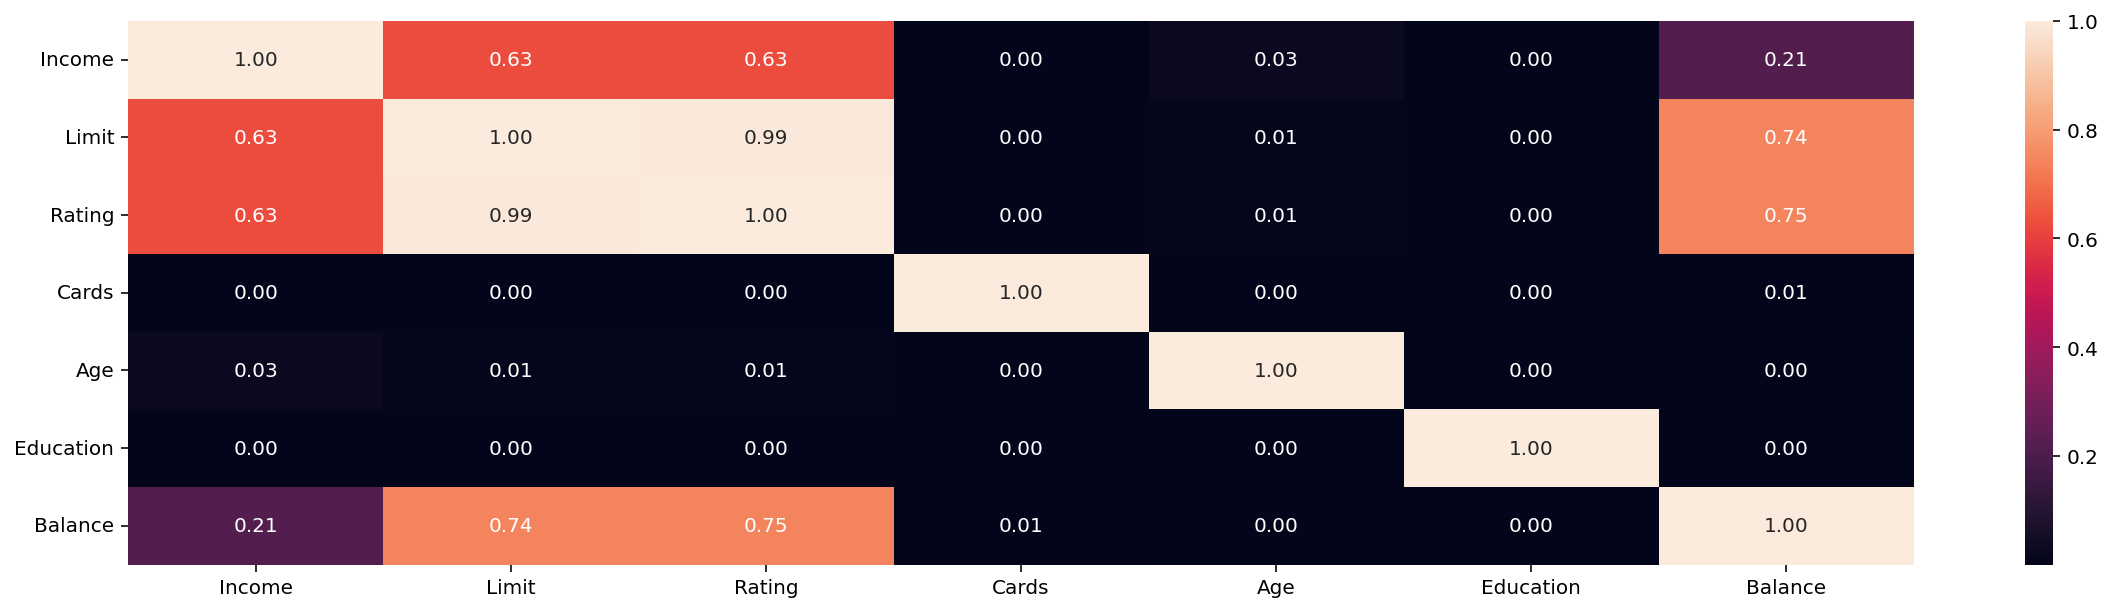

In [13]:
plt.figure(figsize=(20, 5))
sns.heatmap( filtered_df.corr() ** 2, annot=True, fmt=".2f")
plt.show()

In [ ]:
# Balance와 관계가 없는 컬럼 Cards, Age, Education 확인

In [14]:
features.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'], dtype='object')

In [15]:
features.columns[:-3]

Index(['Income', 'Limit', 'Rating'], dtype='object')

In [16]:
features_2 = features[features.columns[:-3]]
features_2.tail(2)

,Income,Limit,Rating
398,37.728,2525,192
399,18.701,5524,415


In [17]:
model = LinearRegression().fit(features_2, target)
pred = model.predict(features_2)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

120.44

In [ ]:
# Cards, Age, Education 3개의 컬럼을 제거해도 성능에 큰 변화가 없음 

In [ ]:
# 2. 요약표 확인

In [18]:
import statsmodels.api as sm

In [19]:
# features 로 확인하면 Education 컬럼의 p-value가 높게 나와서 Education 컬럼 제거하는것이 좋음
sm_feature = sm.add_constant(features_2)

In [20]:
model = sm.OLS(target, sm_feature).fit()

In [21]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.875    
Dependent Variable: Balance          AIC:                5210.9503
Date:               2022-05-26 10:41 BIC:                5226.9161
No. Observations:   400              Log-Likelihood:     -2601.5  
Df Model:           3                F-statistic:        934.6    
Df Residuals:       396              Prob (F-statistic): 3.20e-179
R-squared:          0.876            Scale:              26359.   
-------------------------------------------------------------------
          Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const   -489.7275   32.0989  -15.2568  0.0000  -552.8331  -426.6219
Income    -7.7193    0.3781  -20.4184  0.0000    -8.4626    -6.9761
Limit      0.0847    0.0447    1.8939  0.0590    -0.0032     0.1726
Rating     2.6986    0.6659    4.0523  0.0001     1.3894     4.0078
------

In [22]:
# MAE 확인
pred =  np.dot(sm_feature, model.params)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

120.44

In [ ]:
# 3. VIF 지표 확인

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
pd.DataFrame({
    "feature": features_2.columns,
    "VIF": [variance_inflation_factor(features_2.values, idx)
            for idx in range(features_2.shape[1])]
})

,feature,VIF
0,Income,6.913744
1,Limit,378.629519
2,Rating,357.000572


In [25]:
# Limit 제거
features_3 = features_2.drop(columns=["Limit"])
features_3.tail(2)

,Income,Rating
398,37.728,192
399,18.701,415


In [26]:
pd.DataFrame({
    "feature": features_3.columns,
    "VIF": [variance_inflation_factor(features_3.values, idx)
            for idx in range(features_3.shape[1])]
})

,feature,VIF
0,Income,6.325112
1,Rating,6.325112


In [27]:
# 요약표 확인
sm_feature = sm.add_constant(features_3)
model = sm.OLS(target, sm_feature).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.874    
Dependent Variable: Balance          AIC:                5212.5571
Date:               2022-05-26 10:43 BIC:                5224.5315
No. Observations:   400              Log-Likelihood:     -2603.3  
Df Model:           2                F-statistic:        1391.    
Df Residuals:       397              Prob (F-statistic): 4.52e-180
R-squared:          0.875            Scale:              26530.   
-------------------------------------------------------------------
          Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const   -534.8122   21.6027  -24.7567  0.0000  -577.2821  -492.3422
Income    -7.6721    0.3785  -20.2718  0.0000    -8.4162    -6.9281
Rating     3.9493    0.0862   45.8103  0.0000     3.7798     4.1187
------------------------------------------------------------------
Omnibus

In [28]:
# MAE 확인
pred =  np.dot(sm_feature, model.params)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

120.8

In [ ]:
# R-squared의 변화가 거의 없음
# mae : 120.44 > 120.8 거의 변화 없음
# 결론 Income, Rating 컬럼만 사용해서 모델을 만드는것이 가장 좋음